**Importation des modules**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import RadiusNeighborsClassifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

**Importation du dataset**

In [ ]:
data=pd.read_csv('CICIDS2017_sample_km.csv')

**Exploration des données**

In [ ]:
data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.0,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
data.shape

(26800, 78)

In [ ]:
lab = data.Label.value_counts()
lab

0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: Label, dtype: int64

In [ ]:
lab_list=["BENIGN", "Dos", "WebAttaque", "Bot", "PortScan", "BruteForce", "Infiltration"]

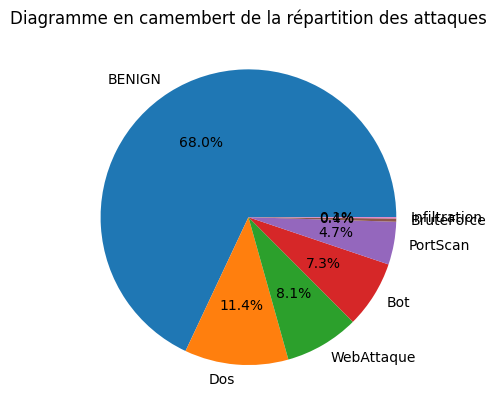

In [ ]:
plt.pie(lab, labels=lab_list, autopct='%1.1f%%')
plt.title('Diagramme en camembert de la répartition des attaques')
plt.show()

**D'après ce diagramme en camembert:** on remarque un équilibre entre les classes d'attaques, ce qui doit résolu avant l'étape de modélisation avec une stratégie d’échantillonnage, pour aboutir à un modèle plus performant.

**Vérification des données manquantes**

In [ ]:
data.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 78, dtype: int64

**Imputation des valeurs manquantes**

In [ ]:
#Construire une liste contenant les varibales
col_list = data.columns.tolist()

In [ ]:
data['Label'].fillna(data['Label'].mode()[0], inplace=True)

In [ ]:
#Imputer les varibales avec le mode : la valeur la plus fréquentes
imputer = SimpleImputer(strategy='most_frequent')
data[col_list] = imputer.fit_transform(data[col_list])

In [ ]:
data.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 78, dtype: int64

**Encodage des variables catégorielles manuellement pour distinguer les types d'attaques**

In [ ]:
#encoding = {'BENIGN':0, 'PortScan':1,'DoS':2,'WebAttack':3,'Bot':4,'BruteForce':5,'Infiltration':6}
#data['Label'] = data['Label'].replace(encoding)

In [ ]:
data.Label.value_counts()

0.0    18225
3.0     3042
6.0     2180
1.0     1966
5.0     1255
2.0       96
4.0       36
Name: Label, dtype: int64

**Préciser les variables expliquatives et la variable à expliquer**

In [ ]:
X=data.drop(['Label'], axis=1)
y=data['Label']

**Division des instances du jeu de données en une partie pour l’entrainement
et une partie pour le test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**SMOTE pour équilibrer les classes non balancées**

In [ ]:
pd.Series(y_train).value_counts()

0.0    14542
3.0     2450
6.0     1761
1.0     1607
5.0      986
2.0       66
4.0       28
Name: Label, dtype: int64

In [ ]:
smote=SMOTE(n_jobs=1, sampling_strategy={2:1000,4:1000})

In [ ]:
X_train, y_train =smote.fit_resample(X_train, y_train )

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
pd.Series(y_train).value_counts()

0.0    14542
3.0     2450
6.0     1761
1.0     1607
4.0     1000
2.0     1000
5.0      986
Name: Label, dtype: int64

# **Partie 1 : implémentation du premier classificateur 1 : Logistic Regression**

Le classificateur de régression logistique est un modèle d'apprentissage automatique supervisé utilisé pour prédire la probabilité d'un événement binaire. Il fonctionne en utilisant une fonction de régression logistique pour modéliser la relation entre les variables d'entrée et la variable de sortie binaire.

**Fonctionnement** : La fonction de régression logistique prend les valeurs d'entrée et calcule la probabilité de la variable de sortie en utilisant la fonction logistique, qui produit une valeur entre 0 et 1. La probabilité calculée peut ensuite être utilisée pour effectuer une classification binaire en utilisant un seuil de décision, généralement 0,5. Si la probabilité calculée est supérieure au seuil de décision, la classe positive est prédite, sinon la classe négative est prédite.

**Méthode One vs One Classifier**

In [ ]:
clf = OneVsOneClassifier(LogisticRegression(max_iter=1000))

In [ ]:
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time
print("Temps pour cnstruire le modèle : ", training_time, "secondes")

Temps pour cnstruire le modèle :  4.059496641159058 secondes


In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8552238805970149


In [ ]:

print('LogisticRegression accuracy '+str(accuracy_score(y_test, y_pred)))
print ('LogisticRegression Precision '+str(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('LogisticRegression recall '+str(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print('LogisticRegression avrage f1 '+str(f1_score(y_test, y_pred, average='weighted', zero_division=1)))



LogisticRegression accuracy 0.8552238805970149
LogisticRegression Precision 0.8641543866480274
LogisticRegression recall 0.8552238805970149
LogisticRegression avrage f1 0.8522098402162099


In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      3683
         1.0       0.49      0.59      0.54       359
         2.0       0.00      0.00      0.00        30
         3.0       0.94      0.66      0.77       592
         4.0       0.14      0.38      0.20         8
         5.0       0.93      0.48      0.63       269
         6.0       0.90      0.86      0.88       419

    accuracy                           0.86      5360
   macro avg       0.61      0.56      0.56      5360
weighted avg       0.86      0.86      0.85      5360



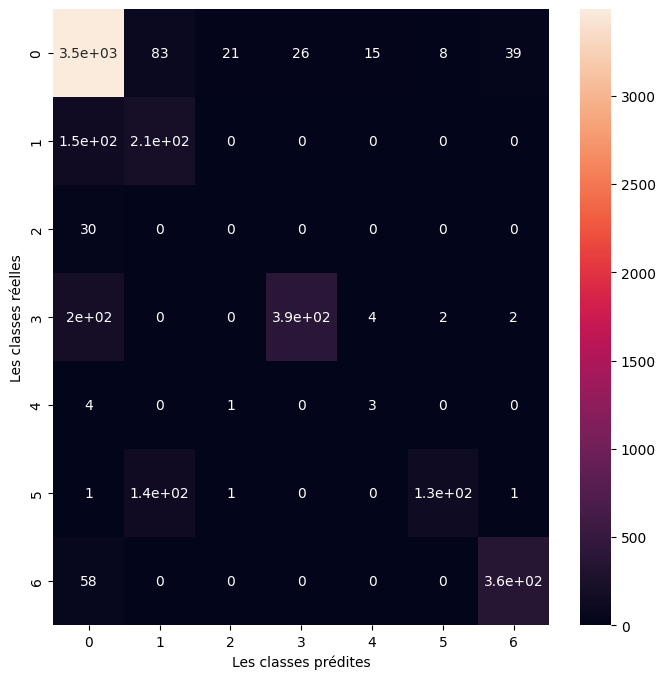

In [ ]:
cm=confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Les classes prédites")
plt.ylabel("Les classes réelles")
plt.show()


**La méthode One vs All Manuellement**

**Définir la liste des classes pour boucler sur,  et une liste vide pour stocker les temps de construction des modèles**

In [ ]:
classes=[0,1,2,3,4,5,6]
tem=[]

**Initialisation et entrainement des modèles**

In [ ]:
models = []
for i in classes:
    model = LogisticRegression(solver='liblinear')
    y_train_i = (y_train == i)
    start_time = time.time()
    model.fit(X_train, y_train_i)
    end_time = time.time()
    total_time = end_time - start_time
    tem.append(total_time)
    models.append(model)



In [ ]:
tem

[0.5552654266357422,
 0.2619783878326416,
 0.2598247528076172,
 0.2627439498901367,
 0.21956825256347656,
 0.1655106544494629,
 0.2282700538635254]

**Prédiction sur l'ensemble de test**

In [ ]:
y_pred = []
for model in models:
    y_pred_i = model.predict(X_test)
    y_pred.append(y_pred_i)
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred.T, axis=1)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8123134328358209


**Evaluation**

In [ ]:
print('LogisticRegression accuracy '+str(accuracy_score(y_test, y_pred, )))
print ('LogisticRegression Precision '+str(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('LogisticRegression recall '+str(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print('LogisticRegression avrage f1 '+str(f1_score(y_test, y_pred, average='weighted', zero_division=1)))

LogisticRegression accuracy 0.8123134328358209
LogisticRegression Precision 0.8232064441691064
LogisticRegression recall 0.8123134328358209
LogisticRegression avrage f1 0.7578285847166016


In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88      3683
         1.0       1.00      0.00      0.00       359
         2.0       0.00      0.00      0.00        30
         3.0       0.96      0.60      0.74       592
         4.0       0.75      0.38      0.50         8
         5.0       0.67      0.03      0.06       269
         6.0       0.90      0.86      0.88       419

    accuracy                           0.81      5360
   macro avg       0.72      0.41      0.44      5360
weighted avg       0.82      0.81      0.76      5360



**Matrice de confusion**

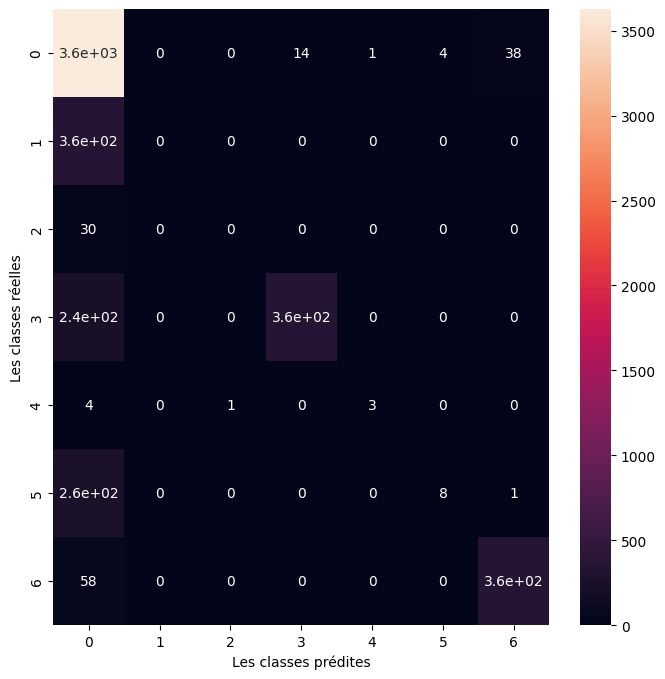

In [ ]:
cm=confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Les classes prédites")
plt.ylabel("Les classes réelles")
plt.show()


**La méthode One vs One Manuellement**

In [ ]:
# Créer les combinaisons des classes possibles
classes = np.arange(7)
class_pairs = list(combinations(classes, 2))
times=[]

In [ ]:
classifiers = []
for pair in class_pairs:
    # Extraire les exemples correspondant à la paire de classes
    X_pair = X_train[(y_train == pair[0]) | (y_train == pair[1])]
    y_pair = y_train[(y_train == pair[0]) | (y_train == pair[1])]
    # Entraîner le classificateur binaire correspondant
    clf = LogisticRegression(max_iter=1000)
    start_time = time.time()
    clf.fit(X_pair, y_pair)
    t = time.time() - start_time
    times.append (t)
    classifiers.append(clf)



In [ ]:
times

[0.4272942543029785,
 0.4746577739715576,
 0.4663968086242676,
 0.2717914581298828,
 0.18796825408935547,
 0.35421276092529297,
 0.04092860221862793,
 0.047867774963378906,
 0.023497343063354492,
 0.028607845306396484,
 0.04654836654663086,
 0.053252458572387695,
 0.026185989379882812,
 0.04785418510437012,
 0.047499656677246094,
 0.07437467575073242,
 0.03582882881164551,
 0.05447793006896973,
 0.016746044158935547,
 0.02543163299560547,
 0.02535867691040039]

**Prédire sur l'ensemble de test**

In [ ]:
predictions = np.zeros((X_test.shape[0], len(class_pairs)))
for i, clf in enumerate(classifiers):
    predictions[:, i] = clf.predict(X_test)



**Voter pour la classe finale pour chaque exemple**

In [ ]:
final_predictions = []
for i in range(X_test.shape[0]):
    votes = np.zeros(7)
    for j, pair in enumerate(class_pairs):
        if predictions[i, j] == pair[0]:
            votes[pair[0]] += 1
        else:
            votes[pair[1]] += 1
    final_predictions.append(np.argmax(votes))

**Evaluation**

In [ ]:
accuracy = np.mean(np.array(final_predictions) == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8561567164179105


In [ ]:
print('Logistic Regression accuracy '+str(accuracy_score(y_test, y_pred)))
print ('Logistic Regression Precision '+str(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Logistic Regression recall '+str(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Logistic Regression average  f1 '+str(f1_score(y_test, y_pred, average='weighted', zero_division=1)))


Logistic Regression accuracy 0.8123134328358209
Logistic Regression Precision 0.8232064441691064
Logistic Regression recall 0.8123134328358209
Logistic Regression average  f1 0.7578285847166016


In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88      3683
         1.0       1.00      0.00      0.00       359
         2.0       0.00      0.00      0.00        30
         3.0       0.96      0.60      0.74       592
         4.0       0.75      0.38      0.50         8
         5.0       0.67      0.03      0.06       269
         6.0       0.90      0.86      0.88       419

    accuracy                           0.81      5360
   macro avg       0.72      0.41      0.44      5360
weighted avg       0.82      0.81      0.76      5360



**Matrice de confusion**

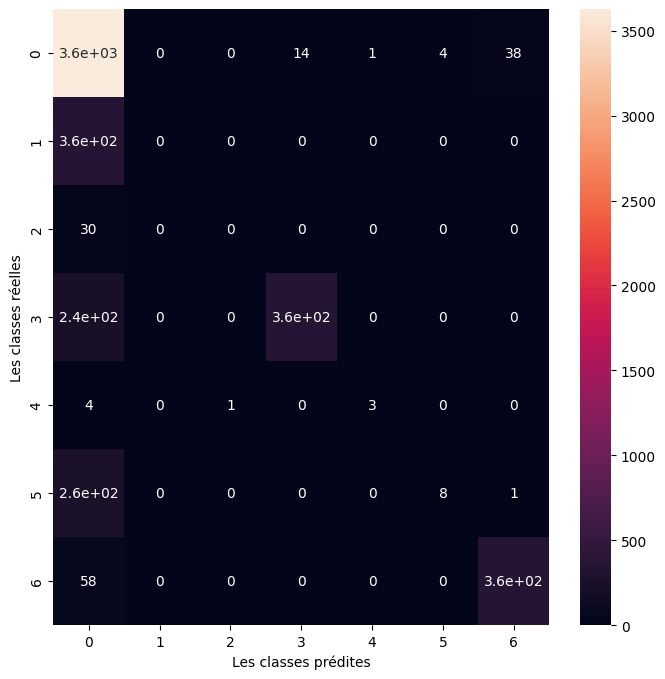

In [ ]:
cm=confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Les classes prédites")
plt.ylabel("Les classes réelles")
plt.show()


# **Partie 2 : implémentation du deuxième classificateur : Radius Neighbors Classifier**

Le classificateur Radius Neighbors Classifier est un algorithme d'apprentissage supervisé non paramétrique qui se base sur la distance euclidienne entre les données. Il est similaire au KNN: K-Nearest Neighbors Classifier, mais au lieu de prendre en compte les k voisins les plus proches, il considère tous les voisins situés à une distance donnée appelée "radius".

**Fonctionnement :** Le fonctionnement du classificateur Radius Neighbors Classifier se fait en deux étapes. Tout d'abord, l'algorithme détermine le rayon à partir d'une valeur donnée (hyperparamètre) et de l'ensemble de données d'entraînement.
Ensuite, pour chaque observation dans l'ensemble de données de test, le classificateur Radius Neighbors Classifier identifie tous les points de l'ensemble d'entraînement qui se trouvent dans le rayon spécifié autour de l'observation.
Le classificateur attribue ensuite la classe majoritaire de ces voisins à l'observation en question.

**Chercher le meilleur rayoon**

In [ ]:
#Définir une liste contenant les rayons possibles
radii = [0.1, 0.5, 1,1.25,1.5, 1.75, 2,2.25,2.5,2.75,3, 4, 5]

In [ ]:
best_radius = None
best_accuracy = 0

In [ ]:
# Parcourir les rayons et trouver le meilleur
for radius in radii:
    clf = RadiusNeighborsClassifier(radius=radius)
    scores = cross_val_score(clf, X, y, cv=5)
    accuracy = np.mean(scores)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_radius = radius

In [ ]:
# Afficher le meilleur rayon et la meilleure précision associée
print("Le meilleur rayon est de :", best_radius)
print("La précision associée est de :", best_accuracy)

Le meilleur rayon est de : 2.25
La précision associée est de : 0.7101492537313433


**Utiliser le meilleur rayon trouvé**

In [ ]:
rn = RadiusNeighborsClassifier(radius=2.25)

In [ ]:
start_time = time.time()
rn.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

print("Temps pris pour construire le modèle : ", total_time, " secondes")

Temps pris pour construire le modèle :  0.04174494743347168  secondes


**Faire la prédiction sur les données de test**

In [ ]:
y_pred = rn.predict(X_test)

**Evaluation**

In [ ]:
print('Radius Neighbors Classifier accuracy '+str(accuracy_score(y_test, y_pred)))
print ('Radius Neighbors Classifier Precision '+str(precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Radius Neighbors Classifier recall '+str(recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Radius Neighbors Classifier avrage f1 '+str(f1_score(y_test, y_pred, average='weighted', zero_division=1)))

Radius Neighbors Classifier accuracy 0.717723880597015
Radius Neighbors Classifier Precision 0.7902843984113568
Radius Neighbors Classifier recall 0.717723880597015
Radius Neighbors Classifier avrage f1 0.620704884079126


In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83      3683
         1.0       1.00      0.00      0.00       359
         2.0       1.00      0.00      0.00        30
         3.0       0.92      0.31      0.46       592
         4.0       0.00      0.00      0.00         8
         5.0       1.00      0.00      0.00       269
         6.0       1.00      0.00      0.00       419

    accuracy                           0.72      5360
   macro avg       0.80      0.19      0.18      5360
weighted avg       0.79      0.72      0.62      5360



**Matrice de confusion**

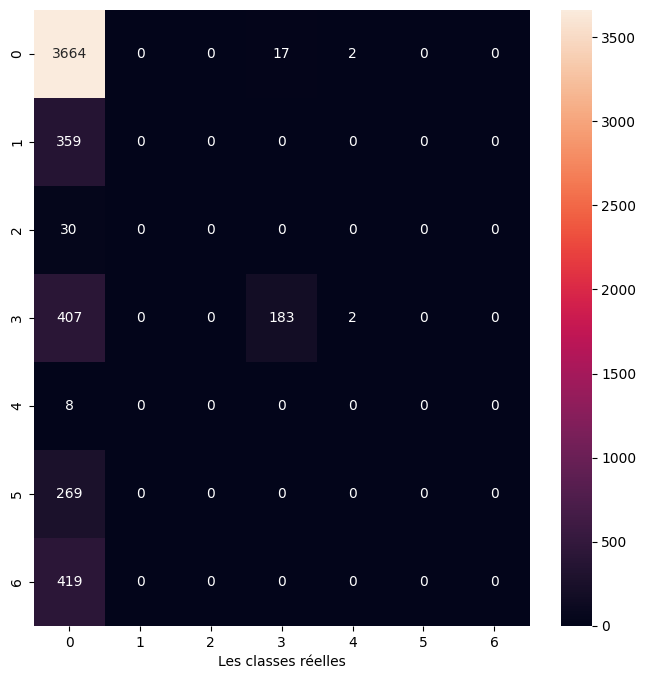

In [ ]:
cm=confusion_matrix(y_test, y_pred)
f, ax=plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Les classes prédites")
plt.xlabel("Les classes réelles")
plt.show()

In [ ]:
# Création d'un modèle RadiusNeighborsClassifier
model = RadiusNeighborsClassifier()

In [ ]:
# Définition des distributions d'hyperparamètres à tester
param_dist = {'radius': uniform(0, 2), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [ ]:
# Exécution de la recherche aléatoire pour trouver les meilleurs hyperparamètres
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)

In [ ]:
%%time
random_search.fit(X_train, y_train)

In [ ]:
print("Meilleurs hyperparamètres: ", random_search.best_params_)
print("Précision du modèle : ", random_search.best_score_)

Meilleurs hyperparamètres:  {'algorithm': 'ball_tree', 'radius': 1.8271542140541168, 'weights': 'distance'}
Précision du modèle :  0.9252977059955796
